In [2]:
import torch
import numpy as np
import datasets
from pathlib import Path
# import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer
import transformers
from transformers import GPT2Tokenizer, GPT2Model
import os 



In [ ]:


LuceneSearcher.list_prebuilt_indexes()

from pyserini.index.lucene import IndexReader
IndexReader.list_prebuilt_indexes()

searcher = LuceneSearcher.from_prebuilt_index('robust04')

index_reader = IndexReader.from_prebuilt_index('robust04')
index_reader.stats()


In [ ]:
from pyserini.search.lucene import LuceneSearcher

searcher = LuceneSearcher.from_prebuilt_index('wikipedia-dpr-100w')
hits = searcher.search('what is a lobster roll?')

for i in range(0, 10):
    print(f'{i+1:2} {hits[i].docid:7} {hits[i].score:.5f}')
    print (wiki_retrieval['train'][hits[i].docid]['text'])


In [7]:


# msmarco = datasets.load_dataset('ms_marco','v2.1')



In [4]:
import datasets
wikitext = datasets.load_dataset('wikitext','wikitext-103-v1')

In [7]:
np.sum([len(x.strip().split(' ')) for x in wikitext['test']['text']])

242678

In [ ]:
tokenizer

In [8]:
len(wikitext['test']['text'])

4358

In [9]:
242678/4

60669.5

In [10]:
60669.5*1.5

91004.25

In [9]:
# model = AutoModel.from_pretrained('facebook/contriever-msmarco')


model = GPT2Model.from_pretrained('gpt2',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-medium',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-large',cache_dir=data_path)
model = GPT2Model.from_pretrained('gpt2-xl',cache_dir=data_path)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2',cache_dir=data_path)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

In [37]:
model = GPT2Model.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


In [47]:
tokenizer('  = Robert Boulter = \n   Robert Boulter is an English film, television and theatre actor. He had a guest @-@')

{'input_ids': [220, 796, 5199, 347, 2852, 353, 796, 220, 198, 220, 220, 5199, 347, 2852, 353, 318, 281, 3594, 2646, 11, 5581, 290, 21421, 8674, 13, 679, 550, 257, 8319, 2488, 12, 31], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [50]:
tokenizer.decode([220])

' '

In [34]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [35]:
tokenized_inputs = tokenizer(['this is the life'],truncation=True,max_length=256,padding='max_length',return_tensors='pt')


In [36]:
tokenized_inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1996, 2166,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,

In [65]:
a = [torch.zeros((100,10)) for _ in range(10)]
a[0][np.arange(10)] = torch.ones((10,10))

In [67]:
a[1]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [32]:
# outputs = model(tokenized_inputs,output_hidden_states=True)['hidden_states'][0],
outputs = model(tokenized_inputs['input_ids'],attention_mask = tokenized_inputs['attention_mask'],output_hidden_states=True)['hidden_states']



In [33]:
torch.norm(outputs[-1],dim=-1)[0]

tensor([ 70.2689, 239.1048, 239.7233, 203.0905, 203.9416, 204.0216, 204.0465,
        204.0731, 203.9806, 203.8637, 203.3750, 202.0950, 200.5750, 199.5256,
        199.3540, 199.4262, 199.2578, 196.7778, 195.4251, 193.6832, 192.2156,
        190.5644, 189.2747, 188.5766, 188.1226, 187.8613, 187.6882, 187.4462,
        187.1632, 187.0865, 187.0010, 186.9335, 186.9003, 187.0474, 186.8544,
        186.9330, 186.5411, 186.4623, 185.9281, 185.4606, 185.2470, 183.5665,
        183.8462, 183.4264, 183.7413, 181.5985, 181.9774, 178.9207, 177.7642,
        179.2290, 175.5588, 168.8589, 165.7018, 167.9049, 158.8792, 148.6907,
        148.9812, 139.5750, 140.2597, 129.0090, 123.9908, 124.1081, 111.3333,
        108.0588, 107.7654, 104.4427,  97.3599,  94.8843,  93.6152,  90.2532,
         90.9231,  88.1287,  87.9211,  85.6964,  81.4686,  82.0894,  82.2038,
         80.5048,  77.9212,  77.1432,  76.6985,  76.4363,  72.5714,  72.2164,
         70.4408,  67.8960,  67.8791,  66.3835,  65.2015,  64.04

In [23]:
outputs

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[-0.0071, -0.0280, -0.3840,  ..., -0.0697, -0.0614, -0.0583],
         [ 0.0380, -0.0588, -0.4663,  ...,  0.1970,  0.3592,  0.3127],
         [ 0.1712, -0.2907, -0.0087,  ..., -0.1196, -0.0877, -0.1371],
         ...,
         [-0.0710,  0.0729,  0.1095,  ...,  0.0168, -0.1149, -0.0701],
         [-0.0710,  0.0721,  0.1088,  ...,  0.0166, -0.1147, -0.0698],
         [-0.0706,  0.0720,  0.1074,  ...,  0.0171, -0.1138, -0.0681]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[-1.1436,  2.0865,  1.0915,  ..., -1.2483, -0.6957,  1.6006],
          [-1.8348,  2.4955,  1.7497,  ..., -1.5397, -2.3685,  2.4482],
          [-2.2444,  2.6332,  1.9227,  ..., -0.6722, -1.5328,  2.0305],
          ...,
          [ 0.1701, -2.3150,  1.6011,  ..., -1.9925,  1.1324,  0.4151],
          [ 0.1873, -2.2708,  1.5980,  ..., -1.9804,  1.1743,  0.4227],
          [ 0.1911, -2.3786,  1.5979,  ..., -2.0125,  1.1603,  0.3585]],

In [17]:
embeds[0]

(tensor([[[-0.0976, -0.2738,  0.1988,  ..., -0.1518,  0.0453, -0.1002],
          [ 0.0142, -0.0437, -0.0393,  ...,  0.1487, -0.0278, -0.0255],
          [-0.0351, -0.0797,  0.0966,  ..., -0.0280,  0.0863, -0.0685],
          ...,
          [ 0.0499, -0.0070,  0.0164,  ...,  0.0065,  0.1590,  0.1174],
          [ 0.0540, -0.0169,  0.0077,  ...,  0.0088,  0.1580,  0.1239],
          [ 0.0462, -0.0079,  0.0028,  ...,  0.0071,  0.1570,  0.1185]]],
        grad_fn=<AddBackward0>),
 (tensor([[[-0.0976, -0.2738,  0.1988,  ..., -0.1518,  0.0453, -0.1002],
           [ 0.0142, -0.0437, -0.0393,  ...,  0.1487, -0.0278, -0.0255],
           [-0.0351, -0.0797,  0.0966,  ..., -0.0280,  0.0863, -0.0685],
           ...,
           [ 0.0499, -0.0070,  0.0164,  ...,  0.0065,  0.1590,  0.1174],
           [ 0.0540, -0.0169,  0.0077,  ...,  0.0088,  0.1580,  0.1239],
           [ 0.0462, -0.0079,  0.0028,  ...,  0.0071,  0.1570,  0.1185]]],
         grad_fn=<AddBackward0>),
  tensor([[[ 0.5141, -0.6707

In [15]:
embeds[0].shape

torch.Size([1, 256, 768])

In [62]:
model(tokenized_inputs,output_hidden_states=True)['past_key_values'][0][0]

torch.Size([1, 12, 256, 64])

In [12]:
wiki_retrieval = datasets.load_dataset('wiki_dpr','psgs_w100.multiset.no_index.no_embeddings')

Generating train split: 0 examples [00:00, ? examples/s]

In [14]:
model = AutoModel.from_pretrained('bert-base-uncased',cache_dir=data_path)
model = AutoModel.from_pretrained('bert-large-uncased',cache_dir=data_path)
model = AutoModel.from_pretrained('roberta-base',cache_dir=data_path)
model = AutoModel.from_pretrained('roberta-large',cache_dir=data_path)


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',cache_dir=data_path)
tokenizer


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [16]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base',cache_dir=data_path)
tokenizer


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [44]:
# tokenizer = AutoTokenizer.from_pretrained("facebook/contriever")

# encoded_datasets = msmarco.map(lambda examples: tokenizer(examples['query']), batched=True)
# print ('Tokenized Dataset')

# encoded_datasets.save_to_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_contriever')


encoded_datasets = msmarco.map(lambda examples: tokenizer(examples['query']), batched=True)
print ('Tokenized Dataset')

encoded_datasets.save_to_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_gpt2xl')



vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Map:   0%|          | 0/101093 [00:00<?, ? examples/s]

Map:   0%|          | 0/808731 [00:00<?, ? examples/s]

Map:   0%|          | 0/101092 [00:00<?, ? examples/s]

Tokenized Dataset


Saving the dataset (0/1 shards):   0%|          | 0/101093 [00:00<?, ? examples/s]

Saving the dataset (0/8 shards):   0%|          | 0/808731 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/101092 [00:00<?, ? examples/s]

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

GPT2Tokenizer(name_or_path='gpt2-xl', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [16]:
np.minimum(2,4)

2

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [17]:
tokenizer("this is the text",return_tensors='np')['input_ids']

array([[5661,  318,  262, 2420]])

In [20]:
tokenizer.decode(np.array([318,  262, 2420]))

' is the text'

In [6]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium',cache_dir='/var/local/pbansal/huggingface/')

tokenizer

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

GPT2Tokenizer(name_or_path='gpt2-medium', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [34]:
len(filtered_queries)

503370

In [46]:
a = datasets.load_from_disk('/var/local/pbansal/huggingface/queries_msmarco_tokenizer_gpt2xl')

[8,
 10919,
 373,
 262,
 7103,
 2928,
 286,
 262,
 1943,
 286,
 262,
 582,
 12904,
 1628,
 30]

In [ ]:
len([x['query'] for x in msmarco['train'] if len(x['wellFormedAnswers'])>0])

(array([6.84895e+05, 1.18274e+05, 4.84900e+03, 6.02000e+02, 1.04000e+02,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  5. ,  47.4,  89.8, 132.2, 174.6, 217. , 259.4, 301.8, 344.2,
        386.6, 429. ]),
 <BarContainer object of 10 artists>)

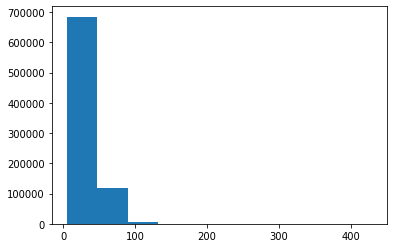

In [25]:

plt.hist([len(x) for x in msmarco['train']['query']])